In [6]:
#https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
boston = datasets.load_boston()

In [16]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['Price'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [ ]:
print(bos.describe())

In [18]:
print(bos['Price'].mean())#Get average Price
print(bos['Price'].median())#median Price

22.5328063241
21.2


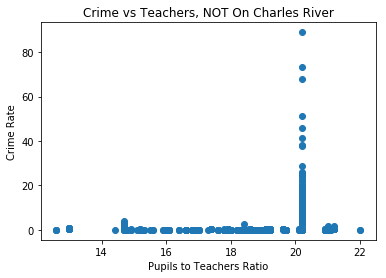

In [19]:
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
#df.loc[df['column_name'] == some_value]
charles_river = bos.loc[bos['CHAS'] < 1]
y_column = charles_river['CRIM']
x_column = charles_river['PTRATIO']

plt.title("Crime vs Teachers, NOT On Charles River")

plt.xlabel("Pupils to Teachers Ratio")

plt.ylabel("Crime Rate")

plt.scatter(x_column, y_column)
plt.show()

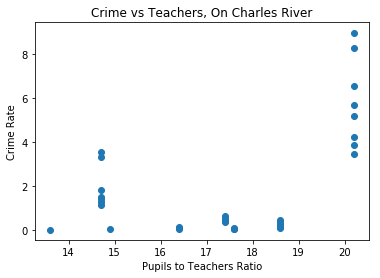

In [20]:
charles_river = bos.loc[bos['CHAS'] >= 1]
y_column = charles_river['CRIM']
x_column = charles_river['PTRATIO']

plt.title("Crime vs Teachers, On Charles River")

plt.xlabel("Pupils to Teachers Ratio")

plt.ylabel("Crime Rate")

plt.scatter(x_column, y_column)
plt.show()

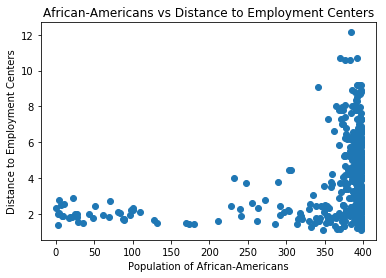

In [25]:
employment_opportunity = bos

y_column = employment_opportunity['DIS']
x_column = employment_opportunity['B']

plt.title("African-Americans vs Distance to Employment Centers")

plt.ylabel("Distance to Employment Centers")

plt.xlabel("Population of African-Americans")

plt.scatter(x_column, y_column)
plt.show()